<a href="https://colab.research.google.com/github/SNK128/Prime-Numbers/blob/main/DLNN(1%20complete).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow import keras

In [ ]:
from google.colab import files
files.upload()

Saving diabetes.csv to diabetes.csv


{'diabetes.csv': b'Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome\r\n6,148,72,35,0,33.6,0.627,50,1\r\n1,85,66,29,0,26.6,0.351,31,0\r\n8,183,64,0,0,23.3,0.672,32,1\r\n1,89,66,23,94,28.1,0.167,21,0\r\n0,137,40,35,168,43.1,2.288,33,1\r\n5,116,74,0,0,25.6,0.201,30,0\r\n3,78,50,32,88,31,0.248,26,1\r\n10,115,0,0,0,35.3,0.134,29,0\r\n2,197,70,45,543,30.5,0.158,53,1\r\n8,125,96,0,0,0,0.232,54,1\r\n4,110,92,0,0,37.6,0.191,30,0\r\n10,168,74,0,0,38,0.537,34,1\r\n10,139,80,0,0,27.1,1.441,57,0\r\n1,189,60,23,846,30.1,0.398,59,1\r\n5,166,72,19,175,25.8,0.587,51,1\r\n7,100,0,0,0,30,0.484,32,1\r\n0,118,84,47,230,45.8,0.551,31,1\r\n7,107,74,0,0,29.6,0.254,31,1\r\n1,103,30,38,83,43.3,0.183,33,0\r\n1,115,70,30,96,34.6,0.529,32,1\r\n3,126,88,41,235,39.3,0.704,27,0\r\n8,99,84,0,0,35.4,0.388,50,0\r\n7,196,90,0,0,39.8,0.451,41,1\r\n9,119,80,35,0,29,0.263,29,1\r\n11,143,94,33,146,36.6,0.254,51,1\r\n10,125,70,26,115,31.1,0.205,41,1\r\n7,147,76,0,0,39.4,0.257,43

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv("diabetes.csv")
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [ ]:
df.shape

(768, 9)

In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
import numpy as np

In [ ]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
x=df.iloc[:,0:8]
#y=df["Outcome"]
x.shape

(768, 8)

In [ ]:
y=df["Outcome"]
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [ ]:
y.shape

(768,)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
obj=StandardScaler()
x=obj.fit_transform(x)
x

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(x,y,test_size=0.2)

In [ ]:
Xtrain.shape

(614, 8)

In [ ]:
Xtest.shape

(154, 8)

In [ ]:
import pandas as pd
import numpy as np
from tensorflow.keras import layers,models

In [ ]:
model=models.Sequential()
model.add(layers.Dense(100,activation="relu"))
model.add(layers.Dense(75,activation="relu"))
model.add(layers.Dense(50,activation="relu"))
model.add(layers.Dense(25,activation="relu"))
model.add(layers.Dense(12,activation="relu"))
model.add(layers.Dense(8,activation="relu"))
model.add(layers.Dense(1,activation="sigmoid"))
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"]
,)
history=model.fit(Xtrain,Ytrain,epochs=150, validation_data=(Xtest,Ytest))
result=model.evaluate(Xtest,Ytest)



Epoch 1/150
20/20 [==============================] - 2s 15ms/step - loss: 0.7756 - accuracy: 0.6173 - val_loss: 0.6226 - val_accuracy: 0.7208
Epoch 2/150
20/20 [==============================] - 0s 5ms/step - loss: 0.6780 - accuracy: 0.6466 - val_loss: 0.6951 - val_accuracy: 0.6104
Epoch 3/150
20/20 [==============================] - 0s 5ms/step - loss: 0.6450 - accuracy: 0.6189 - val_loss: 0.6161 - val_accuracy: 0.7208
Epoch 4/150
20/20 [==============================] - 0s 5ms/step - loss: 0.6251 - accuracy: 0.6498 - val_loss: 0.5969 - val_accuracy: 0.7273
Epoch 5/150
20/20 [==============================] - 0s 5ms/step - loss: 0.6109 - accuracy: 0.6694 - val_loss: 0.6019 - val_accuracy: 0.7208
Epoch 6/150
20/20 [==============================] - 0s 5ms/step - loss: 0.6152 - accuracy: 0.6433 - val_loss: 0.6162 - val_accuracy: 0.7273
Epoch 7/150
20/20 [==============================] - 0s 5ms/step - loss: 0.6091 - accuracy: 0.6629 - val_loss: 0.6030 - val_accuracy: 0.7338
Epoch 8/150


5/5 - 0s - loss: 0.8550 - accuracy: 0.7078 - 46ms/epoch - 9ms/step


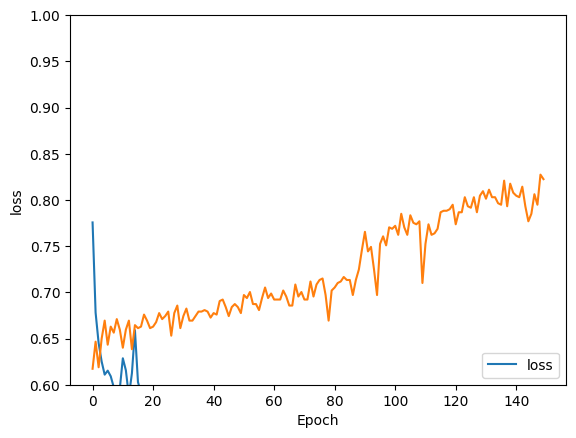

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='loss')
#plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.ylim([0, 0.8])
plt.legend(loc='lower right')
test_loss, test_acc = model.evaluate(Xtest, Ytest, verbose=2)
plt.ylim([0.6,1])
plt.plot(history.history['accuracy'], label = 'accuracy')